In [2]:
!pip install pandas

In [5]:
import sys
sys.executable


'D:\\projects\\AirelineSatisfaction\\myenv\\Scripts\\python.exe'

In [2]:
!python.exe -m pip install --upgrade pip

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense ,BatchNormalization,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
from keras.regularizers import l1
from keras.regularizers import l2
from keras.regularizers import l1_l2

In [2]:
df =pd.read_csv("train.csv")

In [3]:
df["sat_code"] = df.satisfaction.astype("category").cat.codes
df["gender_code"] = df.Gender.astype("category").cat.codes

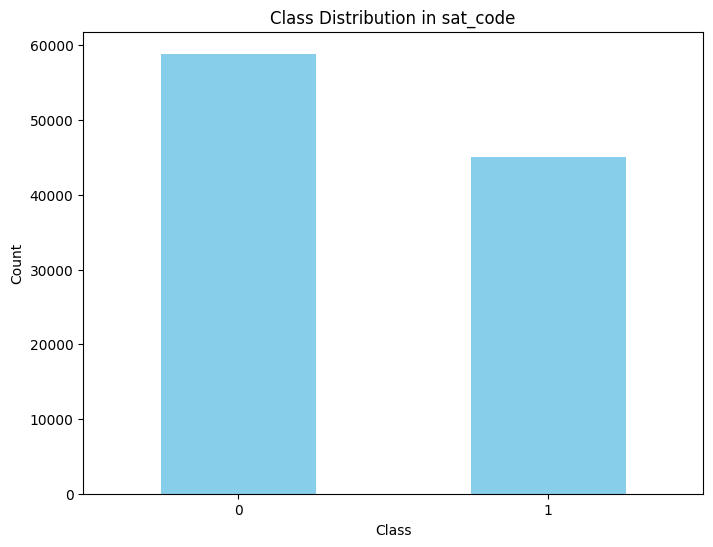

Class Imbalance Ratios:
sat_code
0    0.566667
1    0.433333
Name: count, dtype: float64


In [4]:

# Specify the column you want to check for class imbalance
target_column = "sat_code"  # Replace with the actual column name

# Calculate class distribution
class_distribution = df[target_column].value_counts()

# Plot class distribution
plt.figure(figsize=(8, 6))
class_distribution.plot(kind="bar", color='skyblue')
plt.title("Class Distribution in " + target_column)
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

# Calculate class imbalance ratio
class_ratios = class_distribution / class_distribution.sum()
print("Class Imbalance Ratios:")
print(class_ratios)


In [5]:

df_final = df[['Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness'
       ,'sat_code']]


df_final

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,sat_code
0,3,4,3,1,5,3,5,5,4,3,4,4,5,5,0
1,3,2,3,3,1,3,1,1,1,5,3,1,4,1,0
2,2,2,2,2,5,5,5,5,4,3,4,4,4,5,1
3,2,5,5,5,2,2,2,2,2,5,3,1,4,2,0
4,3,3,3,3,4,5,5,3,3,4,4,3,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,2,1,2,3,2,2,2,2,3,1,4,2,3,2,0
103900,4,4,4,4,2,4,5,5,5,5,5,5,5,4,1
103901,1,1,1,3,4,1,5,4,3,2,4,5,5,4,0
103902,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0


In [6]:
df_final.iloc[:,1:]

,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,sat_code
0,4,3,1,5,3,5,5,4,3,4,4,5,5,0
1,2,3,3,1,3,1,1,1,5,3,1,4,1,0
2,2,2,2,5,5,5,5,4,3,4,4,4,5,1
3,5,5,5,2,2,2,2,2,5,3,1,4,2,0
4,3,3,3,4,5,5,3,3,4,4,3,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,1,2,3,2,2,2,2,3,1,4,2,3,2,0
103900,4,4,4,2,4,5,5,5,5,5,5,5,4,1
103901,1,1,3,4,1,5,4,3,2,4,5,5,4,0
103902,1,1,5,1,1,1,1,4,5,1,5,4,1,0


In [7]:
df_final['Cleanliness'].unique()

array([5, 1, 2, 3, 4, 0], dtype=int64)

In [8]:
X = df_final.iloc[:,:-1]
y= df["sat_code"]

In [108]:
# datagen = ImageDataGenerator(
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )

# augmented_data = datagen.flow(X_train, y_train, batch_size=20)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
20921,4,5,4,1,5,4,5,2,2,4,3,5,2,4
36897,4,4,4,2,1,4,5,1,4,2,4,3,5,1
8468,2,3,2,1,1,2,1,1,5,4,5,5,5,1
53490,3,5,3,4,3,5,4,5,5,3,5,3,5,5
78687,2,2,2,3,1,2,1,1,1,2,3,5,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54886,3,5,3,5,3,3,3,3,4,3,2,3,2,3
76820,3,4,3,1,3,3,2,3,5,1,2,4,4,3
103694,1,2,2,2,1,1,1,4,3,3,3,1,1,1
860,5,5,5,5,5,5,5,5,1,2,4,1,3,5


In [10]:
model = Sequential()


model.add(Dense(units=512, activation='relu', input_dim=X_train.shape[1], kernel_regularizer=l2(0.01)))

model.add(BatchNormalization())

model.add(Dense(units=256, activation='relu'))
model.add(BatchNormalization())
# model.add(Dropout(0.1))
model.add(Dense(units=128, activation='relu'))
model.add(BatchNormalization())
# # model.add(Dropout(0.1))
model.add(Dense(units=64, activation='relu'))
model.add(BatchNormalization())
# # model.add(Dropout(0.1))
model.add(Dense(units=32, activation='relu'))
model.add(BatchNormalization())
#model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))  # Use 'softmax' if you have multiple classes



def lr_schedule(epoch):
    # Initial learning rate
    initial_lr = 0.0001

    # You can define your own learning rate schedule here.
    # For example, you can reduce the learning rate by a factor of 0.1 every 10 epochs.
    lr = initial_lr * (0.1 ** (epoch // 5))
    print(f"Learning rate for epoch {epoch + 1}: {lr}")

    return lr

# Create a LearningRateScheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule)

# Compile the model with the learning rate scheduler
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model with the learning rate scheduler callback
history = model.fit(X_train, y_train, epochs=10, batch_size=40, validation_split=0.2, callbacks=[lr_scheduler])

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy*100:.2f}%")




Learning rate for epoch 1: 0.0001
Epoch 1/10
1663/1663 [==============================] - 10s 5ms/step - loss: 0.5077 - accuracy: 0.8882 - val_loss: 0.4040 - val_accuracy: 0.9194 - lr: 1.0000e-04
Learning rate for epoch 2: 0.0001
Epoch 2/10
1663/1663 [==============================] - 8s 5ms/step - loss: 0.3975 - accuracy: 0.9145 - val_loss: 0.3425 - val_accuracy: 0.9335 - lr: 1.0000e-04
Learning rate for epoch 3: 0.0001
Epoch 3/10
1663/1663 [==============================] - 8s 5ms/step - loss: 0.3436 - accuracy: 0.9224 - val_loss: 0.2971 - val_accuracy: 0.9353 - lr: 1.0000e-04
Learning rate for epoch 4: 0.0001
Epoch 4/10
1663/1663 [==============================] - 8s 5ms/step - loss: 0.3073 - accuracy: 0.9270 - val_loss: 0.2738 - val_accuracy: 0.9368 - lr: 1.0000e-04
Learning rate for epoch 5: 0.0001
Epoch 5/10
1663/1663 [==============================] - 8s 5ms/step - loss: 0.2806 - accuracy: 0.9286 - val_loss: 0.2496 - val_accuracy: 0.9374 - lr: 1.0000e-04
Learning rate for epoch 

In [11]:
loss, accuracy = model.evaluate(X, y)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy*100:.2f}%")

3247/3247 [==============================] - 6s 2ms/step - loss: 0.2149 - accuracy: 0.9493
Test Loss: 0.2149
Test Accuracy: 94.93%


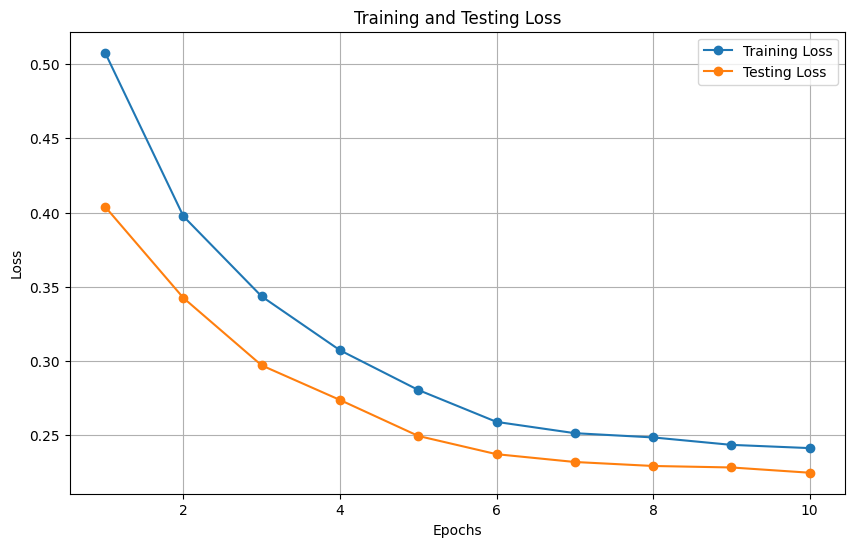

In [12]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create an array of epoch numbers for the x-axis
epochs = range(1, len(train_loss) + 1)

# Plot training and testing loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, label='Training Loss', marker='o')
plt.plot(epochs, test_loss, label='Testing Loss', marker='o')
plt.title('Training and Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


